In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples= 1000,n_features = 2,n_targets =1,noise = 3.0)

In [5]:
X

array([[ 1.67008096, -0.37612706],
       [-0.84249262,  0.78369669],
       [-0.42803377,  1.29367225],
       ...,
       [-2.9817793 , -1.6484693 ],
       [-0.7365003 ,  1.89723593],
       [ 2.69065073, -0.02495981]])

In [6]:
y

array([  97.28667974,  -14.47352823,   38.91501808,  262.49868979,
        -43.69543477,   80.00124168,   74.73148928,  -13.23967109,
        153.48729503,  -15.54677175,  118.66031764,  -65.25797553,
       -190.13123328,  -95.7910355 ,  199.07575616,   34.22501558,
        -42.47784167,   99.91225138,  -27.57157065,   24.17813876,
        -60.39393298,  -98.41377493,  -73.25860496,  -58.0237494 ,
       -164.6937911 , -188.7557404 ,  115.43314358,  104.96686288,
        -71.10403224, -164.03495519,  110.82387937,  -46.04468095,
         60.62914314, -101.19966841,  -44.26952774,   73.86963235,
        -12.06141345,    6.25341094,  -26.35417021,   27.78686519,
          3.31424061,  -21.47449957,   45.77840791,   -4.48787539,
        126.7477918 ,  101.90332577,  186.38588381,  -41.3545066 ,
         67.29323766,   49.02625691,  -51.72675395,   59.68034563,
         47.20363698,  152.98333386,  172.2483431 , -317.80450811,
         20.63126518,  -69.41094766,  -91.35805361,  -56.50224

In [7]:
pd.DataFrame(X)[0]

0      1.670081
1     -0.842493
2     -0.428034
3      2.089942
4     -0.506339
         ...   
995   -0.041209
996    1.417699
997   -2.981779
998   -0.736500
999    2.690651
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

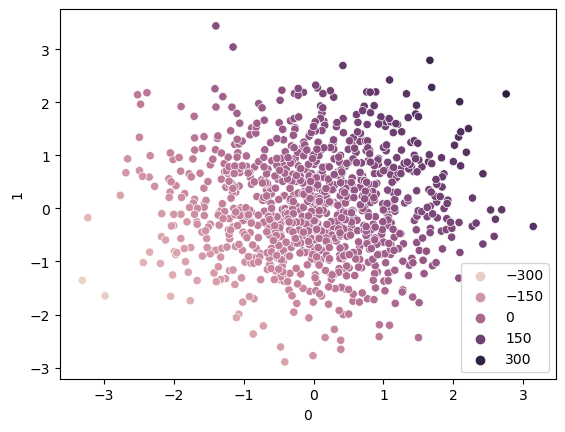

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue= y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size = 0.25)

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel = "linear")

In [13]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [14]:
y_pred = svr.predict(X_test)

In [15]:
y_pred

array([-9.38231004e+01,  1.07440022e+02,  9.93199260e+00,  1.06852646e+02,
       -6.18801200e+01, -3.18530294e+01, -8.22339136e+01,  5.19982007e+01,
       -6.86933576e+01,  2.32565734e+01, -2.00192746e+01, -6.24714451e+01,
        5.15595846e+01,  6.60492879e+01,  2.94252872e+01,  2.07822448e+01,
        1.23217570e+02, -1.37445766e+02,  1.05058022e+01,  4.82741400e+01,
        7.79976821e+01,  4.03482480e+01, -1.42547756e+02,  1.82401678e+01,
        7.49531461e+01, -4.24154413e+01,  7.74548082e+01,  7.08008550e+01,
        2.41407225e+01,  7.23779062e+01, -5.98881707e+01,  3.23770529e+01,
       -7.23044713e+00,  6.49645435e+01,  1.51934827e+02,  1.04828015e+02,
       -1.20669556e+02, -1.45975652e+02,  8.01433596e+01, -4.70621366e+01,
        4.67322928e+01, -1.13729957e+02, -1.34148417e+02, -3.34459747e+01,
        1.31716752e+01,  2.86115580e+01, -1.41659973e+01, -2.34935210e+01,
       -1.63536672e+01, -1.07986634e+01,  1.03978680e+02, -2.13436279e+02,
       -1.07635115e+01,  

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(r2_score(y_pred,y_test))


0.9987244711361081


In [19]:
from sklearn.model_selection import GridSearchCV
parameter = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001], 
             'epsilon':[.1,.2,.3]
}

In [21]:
gridsearchcv = GridSearchCV(SVR(),param_grid = parameter,refit = True,cv=5,verbose = 3)

In [22]:
gridsearchcv.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.100 total time=   0.0s
[CV 2/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.087 total time=   0.0s
[CV 3/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.008 total time=   0.0s
[CV 4/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.086 total time=   0.0s
[CV 5/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.117 total time=   0.0s
[CV 1/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.110 total time=   0.0s
[CV 2/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.107 total time=   0.0s
[CV 3/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.023 total time=   0.0s
[CV 4/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.104 total time=   0.0s
[CV 5/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.117 total time=   0.0s
[CV 1/5] END ....C=0.1, epsilon=0.1, gamma=0.01;, score=0.014 total time=   0.0s
[CV 2/5] END ....C=0.1, epsilon=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
gridsearchcv.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 0.001}

In [24]:
y_pred = gridsearchcv.predict(X_test)
print(r2_score(y_test,y_pred))


0.9987041789552403
